In [1]:
import pandas as pd
import numpy as np

In [2]:
train_datapath = 'data/data137263/pubg_train.csv.zip'
test_datapath = 'data/data137263/pubg_test.csv.zip'

train_df = pd.read_csv(train_datapath)
test_df = pd.read_csv(test_datapath)

In [3]:
train_df.shape, test_df.shape

((1500000, 16), (500000, 15))

In [4]:
# train_df.head()
train_df

,match_id,team_id,game_size,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,kill_distance_x_min,kill_distance_x_max,kill_distance_y_min,kill_distance_y_max,team_placement
0,0,1,50,2,0,1,4984.54900,2054.031490,218,2,0,1689.9,3992.9,137.0,819.8,5
1,0,1,50,2,1,0,5960.46436,2268.221000,125,0,1,NaN,NaN,NaN,NaN,5
2,0,2,50,2,0,0,0.00000,0.000000,0,0,2,NaN,NaN,NaN,NaN,49
3,0,2,50,2,0,0,0.00000,5.211829,41,0,3,NaN,NaN,NaN,NaN,49
4,0,3,50,2,0,0,0.00000,341.730927,69,0,4,NaN,NaN,NaN,NaN,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499995,14999,4,28,4,0,1,0.00000,2236.734620,284,0,992602,NaN,NaN,NaN,NaN,10
1499996,14999,26,28,4,0,2,0.00000,700.453100,225,0,992603,NaN,NaN,NaN,NaN,20
1499997,14999,26,28,4,0,1,0.00000,861.909600,40,1,992604,259.3,259.3,76.7,76.7,20
1499998,14999,26,28,4,0,0,0.00000,844.545837,134,0,992605,NaN,NaN,NaN,NaN,20


In [5]:
train_df = train_df.drop(['match_id', 'team_id', 'player_name', 'kill_distance_x_min', 'kill_distance_x_max', 'kill_distance_y_min', 'kill_distance_y_max'], axis=1)
test_df = test_df.drop(['match_id', 'team_id', 'player_name', 'kill_distance_x_min', 'kill_distance_x_max', 'kill_distance_y_min', 'kill_distance_y_max'], axis=1)

# train_df = train_df.drop(['match_id', 'team_id', 'player_name'], axis=1)
# test_df = test_df.drop(['match_id', 'team_id', 'player_name'], axis=1)

train_df = train_df.fillna(0)
test_df = test_df.fillna(0)

In [6]:
# 数值归一化
for col in train_df.columns[:-1]:
    train_df[col] /= train_df[col].max()
    test_df[col] /= test_df[col].max()

## 神经网络预测

In [28]:
import paddle


class PUBGRegressor(paddle.nn.Layer):
    def __init__(self):
        super(PUBGRegressor, self).__init__()
        
        self.fc1 = paddle.nn.Linear(in_features=13, out_features=40)
        self.fc2 = paddle.nn.Linear(in_features=40, out_features=20)
        self.fc3 = paddle.nn.Linear(in_features=20, out_features=1)

        self.relu = paddle.nn.ReLU()
    
    def forward(self, inputs):
        x = self.fc1(inputs)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        return x

# MAE: 7.271852
# submission: 92.5505
# EPOCH_NUM: 50

In [7]:
import paddle


class PUBGRegressor(paddle.nn.Layer):
    def __init__(self):
        super(PUBGRegressor, self).__init__()
        
        self.fc1 = paddle.nn.Linear(in_features=8, out_features=64)
        self.fc2 = paddle.nn.Linear(in_features=64, out_features=128)
        self.fc3 = paddle.nn.Linear(in_features=128, out_features=256)
        self.fc4 = paddle.nn.Linear(in_features=256, out_features=512)
        self.fc5 = paddle.nn.Linear(in_features=512, out_features=1024)
        self.fc6 = paddle.nn.Linear(in_features=1024, out_features=2048)
        self.fc7 = paddle.nn.Linear(in_features=2048, out_features=2048)
        self.fc8 = paddle.nn.Linear(in_features=2048, out_features=2048)
        self.fc9 = paddle.nn.Linear(in_features=2048, out_features=1024)
        self.fc10 = paddle.nn.Linear(in_features=1024, out_features=512)
        self.fc11 = paddle.nn.Linear(in_features=512, out_features=256)
        self.fc12 = paddle.nn.Linear(in_features=256, out_features=128)
        self.fc13 = paddle.nn.Linear(in_features=128, out_features=64)
        self.fc14 = paddle.nn.Linear(in_features=64, out_features=1)

        self.relu = paddle.nn.ReLU()
    
    def forward(self, inputs):
        x = self.fc1(inputs)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)
        x = self.relu(x)
        x = self.fc6(x)
        x = self.relu(x)
        x = self.fc7(x)
        x = self.relu(x)
        x = self.fc8(x)
        x = self.relu(x)
        x = self.fc9(x)
        x = self.relu(x)
        x = self.fc10(x)
        x = self.relu(x)
        x = self.fc11(x)
        x = self.relu(x)
        x = self.fc12(x)
        x = self.relu(x)
        x = self.fc13(x)
        x = self.relu(x)
        x = self.fc14(x)

        return x

# in_shape: 8
# optimizer: Adam
# MAE: 4.539792
# submission: 95.3586
# EPOCH_NUM: 200(100多个epoch久收敛了)

In [9]:
# 声明定义好的线性回归模型
model = PUBGRegressor()

# 开启模型训练模式
model.train()

# 定义优化算法，使用随机梯度下降SGD
scheduler = paddle.optimizer.lr.CosineAnnealingDecay(learning_rate=0.01, T_max=200)
# opt = paddle.optimizer.SGD(learning_rate=scheduler, parameters=model.parameters())
opt = paddle.optimizer.Adam(learning_rate=scheduler, parameters=model.parameters())
# loss_func = paddle.nn.MSELoss()

In [ ]:
EPOCH_NUM = 200
BATCH_SIZE = 1000
training_data = train_df.iloc[:-10000].values.astype(np.float32)
val_data = train_df.iloc[-10000:].values.astype(np.float32)
min_loss = 100

# 定义外层循环
for epoch_id in range(EPOCH_NUM):
    # 在每轮迭代开始之前，将训练数据的顺序随机的打乱
    np.random.shuffle(training_data)
    
    # 将训练数据进行拆分，每个batch包含10条数据
    mini_batches = [training_data[k:k+BATCH_SIZE] for k in range(0, len(training_data), BATCH_SIZE)]
    
    train_loss = []
    for iter_id, mini_batch in enumerate(mini_batches):
        # 清空梯度变量，以备下一轮计算
        opt.clear_grad()

        x = np.array(mini_batch[:, :-1])
        y = np.array(mini_batch[:, -1:])
        
        # 将numpy数据转为飞桨动态图tensor的格式
        features = paddle.to_tensor(x)
        y = paddle.to_tensor(y)
        
        # 前向计算
        predicts = model(features)
        
        # 计算损失
        loss = paddle.nn.functional.l1_loss(predicts, label=y)
        # loss = loss_func(predicts, label=y)
        avg_loss = paddle.mean(loss)
        train_loss.append(avg_loss.numpy())
        
        # 反向传播，计算每层参数的梯度值
        avg_loss.backward()

        # 更新参数，根据设置好的学习率迭代一步
        opt.step()
    
    mini_batches = [val_data[k:k+BATCH_SIZE] for k in range(0, len(val_data), BATCH_SIZE)]
    val_loss = []
    for iter_id, mini_batch in enumerate(mini_batches):
        x = np.array(mini_batch[:, :-1])
        y = np.array(mini_batch[:, -1:])
        
        features = paddle.to_tensor(x)
        y = paddle.to_tensor(y)
        
        predicts = model(features)
        loss = paddle.nn.functional.l1_loss(predicts, label=y)
        # loss = loss_func(predicts, label=y)
        avg_loss = paddle.mean(loss)
        val_loss.append(avg_loss.numpy())

    print(f'Epoch {epoch_id}, train MAE {np.mean(train_loss)}, val MAE {np.mean(val_loss)}')

    if min_loss > np.mean(val_loss):
        min_loss = np.mean(val_loss)
        paddle.save(model.state_dict(), 'best.model')
        print("min loss: ", min_loss)

In [10]:
model.set_state_dict(paddle.load('loss4.539792.model'))
model.eval()
test_data = paddle.to_tensor(test_df.values.astype(np.float32))
test_predict = model(test_data)
test_predict = test_predict.numpy().flatten()
test_predict = test_predict.round().astype(int)

In [11]:
pd.DataFrame({
    'team_placement': test_predict
}).to_csv('submission.csv', index=None)

!zip submission.zip submission.csv

updating: submission.csv (deflated 69%)


In [12]:
test_predict

array([24, 20, 39, ..., 21, 23, 23])

In [ ]:
# 测试集中label字段team_placement为空，需要选手预测。完整的数据字段含义如下：

# match_id：本局游戏的id
# team_id：本局游戏中队伍id，表示在每局游戏中队伍信息
# game_size：本局队伍数量
# party_size：本局游戏中队伍人数
# player_assists：玩家助攻数
# player_dbno：玩家击倒数
# player_dist_ride：玩家车辆行驶距离
# player_dist_walk：玩家不幸距离
# player_dmg：输出伤害值
# player_kills：玩家击杀数
# player_name：玩家名称，在训练集和测试集中全局唯一
# kill_distance_x_min：击杀另一位选手时最小的x坐标间隔
# kill_distance_x_max：击杀另一位选手时最大的x坐标间隔
# kill_distance_y_min：击杀另一位选手时最小的y坐标间隔
# kill_distance_y_max：击杀另一位选手时最大的x坐标间隔
# team_placement：队伍排名

In [12]:
# 本次竞赛的使用绝对回归误差MAE进行评分，数值越低精度越高，评估代码参考：
from sklearn.metrics import mean_absolute_error
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
100 - mean_absolute_error(y_true, y_pred)

99.5

## 传统机器学习预测

### 决策树

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [23]:
seed = 10086
# x_train, x_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.1, random_state=seed)
training_data = train_df.iloc[:-10000].values.astype(np.float32)
val_data = train_df.iloc[-10000:].values.astype(np.float32)

In [ ]:
# default setting
# model = DecisionTreeRegressor(criterion='mse', splitter='best', random_state=seed)
model = GradientBoostingRegressor(n_estimators=100, random_state=seed)
model.fit(training_data[:, :-1], training_data[:, -1:])

val_pred = model.predict(val_data[:, :-1])
loss = mean_absolute_error(val_data[:, -1:], val_pred)

In [26]:
loss

5.344229589993921

In [ ]:
loss_list = []
for i in range(100, 600, 10):
    model = GradientBoostingRegressor(n_estimators=i, random_state=seed)

    model.fit(training_data[:, :-1], training_data[:, -1:])
    val_pred = model.predict(val_data[:, :-1])
    loss = mean_absolute_error(val_data[:, -1:], val_pred)
    
    # loss = cross_val_score(model, train_data[:, :-1], train_data[:, -1:], cv=10, scoring='neg_mean_absolute_error').mean()
    loss_list.append(loss)
    print(i, loss)

In [27]:
import xgboost as xgb

In [28]:
model = xgb.XGBRegressor(n_estimators=100, random_state=seed, tree_method='gpu_hist')
model.fit(training_data[:, :-1], training_data[:, -1:])

val_pred = model.predict(val_data[:, :-1])
loss = mean_absolute_error(val_data[:, -1:], val_pred)

In [29]:
loss

4.6998477

In [32]:
train_data = train_df.values.astype(np.float32)
model = xgb.XGBRegressor(n_estimators=140, random_state=seed, tree_method='gpu_hist', max_depth=7, subsample=0.8701801801801803, learning_rate=0.2031231231231231)
loss = cross_val_score(model, train_data[:, :-1], train_data[:, -1:], cv=10, scoring='neg_mean_absolute_error').mean()

In [33]:
loss

-4.756084632873535

In [ ]:
loss_list = []
for i in range(10, 500, 10):
    # use gpu
    model = xgb.XGBRegressor(n_estimators=i, random_state=seed, tree_method='gpu_hist')

    # model.fit(training_data[:, :-1], training_data[:, -1:])
    # val_pred = model.predict(val_data[:, :-1])
    # loss = mean_absolute_error(val_data[:, -1:], val_pred)
    
    loss = cross_val_score(model, train_data[:, :-1], train_data[:, -1:], cv=10, scoring='neg_mean_absolute_error').mean()
    loss_list.append(loss)
    print(i, loss)

In [31]:
loss_list = np.asarray(loss_list)
loss_list.min()
# 140 4.6851554

4.6978674

In [23]:
from matplotlib import pyplot as plt

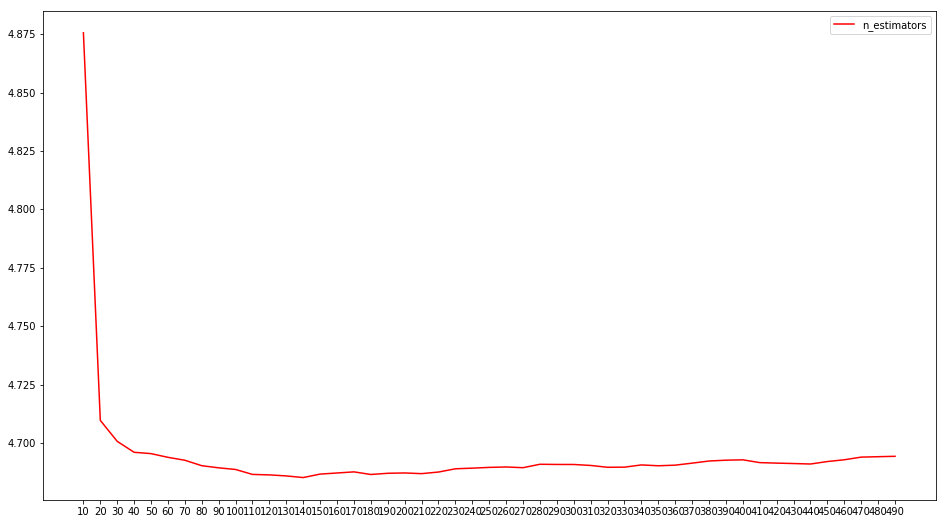

In [25]:
plt.figure(figsize=(16, 9))
plt.plot(range(10, 500, 10), loss_list, color='red', label='n_estimators')
plt.xticks(range(10, 500, 10))
plt.legend()
plt.show()

In [ ]:
loss_list = []
for i in range(3, 13):
    # use gpu
    model = xgb.XGBRegressor(n_estimators=140, random_state=seed, tree_method='gpu_hist', max_depth=i)
    model.fit(training_data[:, :-1], training_data[:, -1:])
    
    val_pred = model.predict(val_data[:, :-1])
    loss = mean_absolute_error(val_data[:, -1:], val_pred)
    loss_list.append(loss)
    print(i, loss)

In [ ]:
loss_list = []
for i in np.linspace(0.01, 1.0, 1000):
    # use gpu
    model = xgb.XGBRegressor(n_estimators=140, random_state=seed, tree_method='gpu_hist', max_depth=7, subsample=i)
    model.fit(training_data[:, :-1], training_data[:, -1:])
    
    val_pred = model.predict(val_data[:, :-1])
    loss = mean_absolute_error(val_data[:, -1:], val_pred)
    loss_list.append(loss)
    print(i, loss)

In [30]:
loss_list = np.asarray(loss_list)
loss_list.min()
# 0.8687525252525252 4.692885(50, 6)
# 0.8701801801801803 4.673659(140, 7)

4.673659

In [ ]:
loss_list = []
for i in np.linspace(0.01, 0.6, 1000):
    # use gpu
    model = xgb.XGBRegressor(n_estimators=140, random_state=seed, tree_method='gpu_hist', max_depth=7, subsample=0.8701801801801803, learning_rate=i)
    model.fit(training_data[:, :-1], training_data[:, -1:])
    
    val_pred = model.predict(val_data[:, :-1])
    loss = mean_absolute_error(val_data[:, -1:], val_pred)
    loss_list.append(loss)
    print(i, loss)

In [11]:
loss_list = np.asarray(loss_list)
loss_list.min()
# 0.37498498498498495 4.685107(50, 6)
# 0.2031231231231231 4.6735706(140, 7)

4.6735706

In [9]:
# model = xgb.XGBRegressor(n_estimators=50, random_state=seed, tree_method='gpu_hist', subsample=0.8687525252525252, learning_rate=0.37498498498498495)
model = xgb.XGBRegressor(n_estimators=140, random_state=seed, tree_method='gpu_hist', max_depth=7, subsample=0.8701801801801803, learning_rate=0.2031231231231231)
model.fit(training_data[:, :-1], training_data[:, -1:])

test_data = test_df.values.astype(np.float32)
test_predict = model.predict(test_data)
test_predict = test_predict.round().astype(int)

# MAE: 4.685107
# cross_MAE: 4.75076003074646
# submission: 95.1809

# MAE: 4.6735706
# cross_MAE: 4.742927551269531
# submission: 95.2091

In [10]:
test_predict

array([24, 19, 38, ..., 20, 21, 22])

In [11]:
pd.DataFrame({
    'team_placement': test_predict
}).to_csv('submission.csv', index=None)

!zip submission.zip submission.csv

updating: submission.csv (deflated 69%)
